In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
N = 100
v = 1
l = 1
l1 = 0.05
l2 = 0.3
Cu = 0.9
dx = l / N
dt = Cu*dx/v
T = 10 * l / (25 * v)
tout = T / 2

In [52]:
def F0(x, t, inital = 4):
    if inital == 1:
        return np.sin(2 * np.pi * (x - v * t)/(T * v)) 
    if inital == 2:
        if x - v * t < 0 :
            return 1
        else:
            return 0
    if inital == 3:
        if (x - v * t) - l1 > 0 and (x - v * t) - l2 < 0:
            return 1
        else:
            return 0
    if inital == 4:
        dg = 0.1 * l
        x1 = 2 * dg
        x2 = x1 + 2*dg
        return np.exp(-pow((x - v * t - x1)/ dg, 2))  + np.exp(-pow((x - v * t - x2)/ dg, 2))

In [53]:
x = np.arange(0, l, dx)
T = np.arange(0, tout, dt)
c = np.zeros(N)
t = 0 
for i in range(N):
    c[i] = F0(x[i], 0)

In [54]:
while t <= tout:
    alpha = np.zeros(N - 1)
    beta = np.zeros(N - 1)
    alpha[0] = 0
    beta[0] = F0(0, t)
    # print(beta[0])
    for i in range (1, N - 1):
        ai  = 1/6
        bi = 2/3
        ci = 1/6
        fi = (1/2*v*dt / dx + 1/6)*c[i - 1] + 2/3*c[i] - (1/2*v*dt / dx - 1/6) * c[i + 1]
        #print(fi)
        alpha[i] = ai / (bi - ci*alpha[i - 1])
        beta[i] = (-fi + ci * beta[i - 1]) / (bi - ci*alpha[i - 1])
        # print(beta[i],'  ', cout)
    c[N - 1] = F0(l,t)
    for i in range(N - 2, -1, -1):
         c[i] = alpha[i]*c[i + 1]  + beta[i]
    t += dt

In [55]:
C0 = [-8e10*F0(i,t) for i in x]

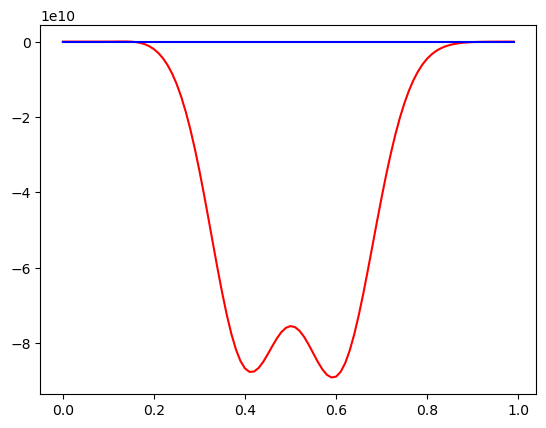

In [56]:
plt.plot(x, c, color='r')
plt.plot(x, C0, color='b')

[ 1.32008437e-07  8.41047025e-01 -1.78095822e+01 -3.25356672e+01
  2.98821927e+01  1.67357149e+02  2.24888610e+02  6.75814592e+01
 -2.38823976e+02 -5.47659500e+02 -8.42668656e+02 -1.22047419e+03
 -1.75548113e+03 -2.47326122e+03 -3.39598998e+03 -4.55248012e+03
 -5.96277038e+03 -7.63185051e+03 -9.54803473e+03 -1.16794551e+04
 -1.39720053e+04 -1.63501328e+04 -1.87201005e+04 -2.09758851e+04
 -2.30074666e+04 -2.47107009e+04 -2.59977141e+04 -2.68065741e+04
 -2.71089790e+04 -2.69149022e+04 -2.62734887e+04 -2.52699539e+04
 -2.40187281e+04 -2.26535326e+04 -2.13154061e+04 -2.01399003e+04
 -1.92447063e+04 -1.87188971e+04 -1.86147818e+04 -1.89431145e+04
 -1.96720969e+04 -2.07302840e+04 -2.20131545e+04 -2.33927633e+04
 -2.47295782e+04 -2.58853459e+04 -2.67356847e+04 -2.71810917e+04
 -2.71552115e+04 -2.66295253e+04 -2.56140630e+04 -2.41542363e+04
 -2.23243782e+04 -2.02189545e+04 -1.79426450e+04 -1.56005287e+04
 -1.32894677e+04 -1.10914973e+04 -9.06966375e+03 -7.26637343e+03
 -5.70398550e+03 -4.38715

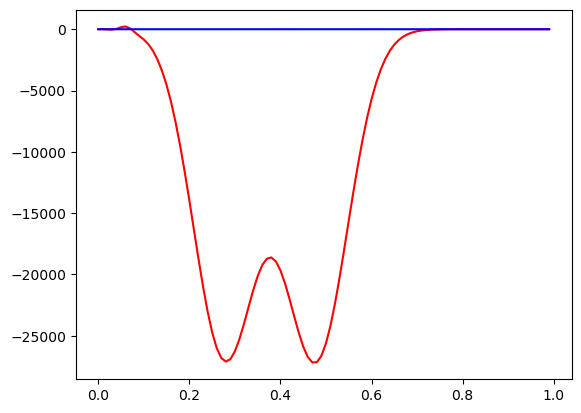

In [71]:
c = np.zeros(N)
for i in range(N):
    c[i] = F0(x[i], 0)

for n, t in enumerate(T):
    # Сохраняем значения на предыдущем шаге
    c_prev = c.copy()
    # Заполняем согласно граничные условия
    d = np.zeros(len(x))
    alpha_0, beta_0, d[0] = 1, 0, F0(0, t)

    A_0 = alpha_0 - beta_0 / dx
    B_0 = beta_0 / dx
    A = C = 1/6
    B = 2/3
    del alpha_0, beta_0,

    a = np.zeros(len(x)-1)
    b = np.zeros(len(x)-1)
    a[0] = - B_0 / A_0
    b[0] = d[0] / A_0 
    for i in range(1, len(x)-1): # Прямой прогон
        d[i] = -((1/2*v*dt / dx + 1/6)*c_prev[i - 1] + 2/3*c_prev[i] - (1/2*v*dt / dx - 1/6) * c_prev[i + 1])
        
        # a[i] = - C / (A * a[i-1] + B)
        a[i] = - C / (A * a[i-1] - B )
        b[i] = (d[i] - A * b[i-1]) / (A * a[i-1] + B)
        # b[i] = (d[i] - A * b[i-1]) / (A * a[i-1] - B)
    c[N - 1] = F0(l,t)
    # c[-1] = (d[-1] - A_l * b[-1]) / (a[-1] * A_l + B_l)

    for i in range(len(x)-1, 0, -1): # Обратный прогон
        c[i-1] = a[i-1] * c[i] + b[i-1]
    
c_0 = np.zeros(len(x))
for i, x_ in enumerate(x):
    c_0[i] = F0(x_, tout)

print(c)
plt.plot(x, c, color='r')
plt.plot(x, c_0, color='b')
plt.show()